Python version = 3.9.5
yfinance version = 0.1.69
Today = 2022-02-06T12:37:00

{
    "Symbol": "TSLA",
    "Letzter Preis": "923.32",
    "Preis gestern": "891.14",
    "Preis Change": "32.18",
    "52-Wochen-Hoch": 1243.49,
    "52-Wochen-Tief": 539.49,
    "Unternehmenswert/EBITDA": 98.966,
    "Durchschnittliche Dividendenrendite 5y": null,
    "Eigenkapitalrendite": 0.19974001,
    "Schulden/Equity (gesamt) (mrq)": 21.638
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


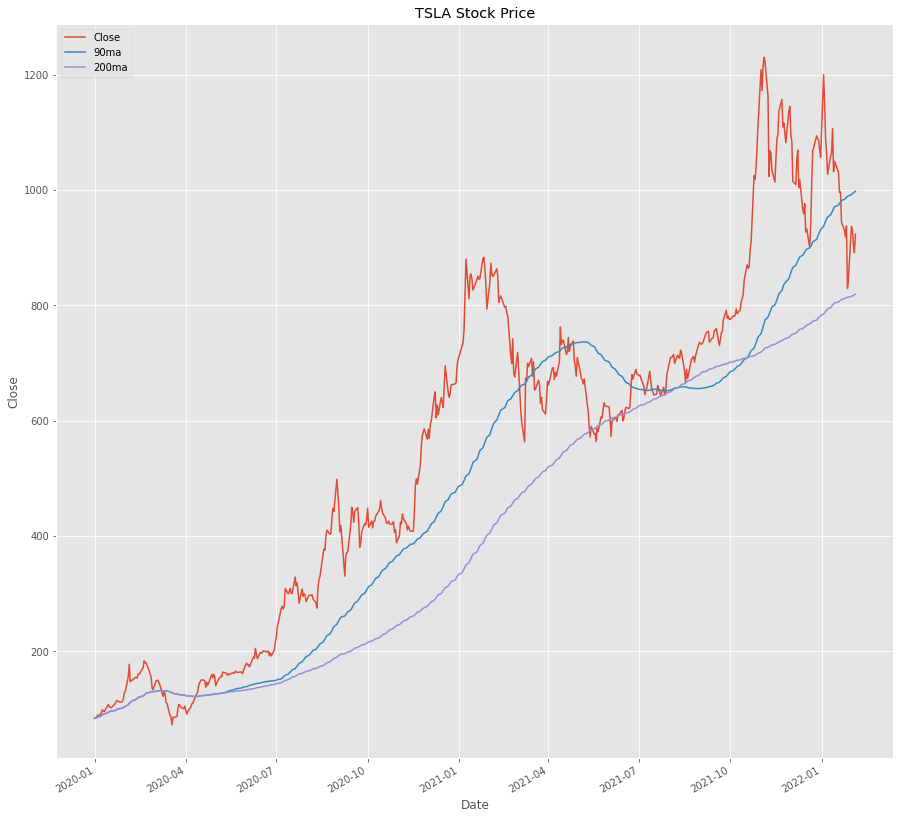


{
    "Symbol": "APC.DE",
    "Letzter Preis": "150.34",
    "Preis gestern": "152.68",
    "Preis Change": "-2.34",
    "52-Wochen-Hoch": 162.52,
    "52-Wochen-Tief": 97.82,
    "Unternehmenswert/EBITDA": 19.594,
    "Durchschnittliche Dividendenrendite 5y": 1.16,
    "Eigenkapitalrendite": 1.45567,
    "Schulden/Equity (gesamt) (mrq)": 170.714
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


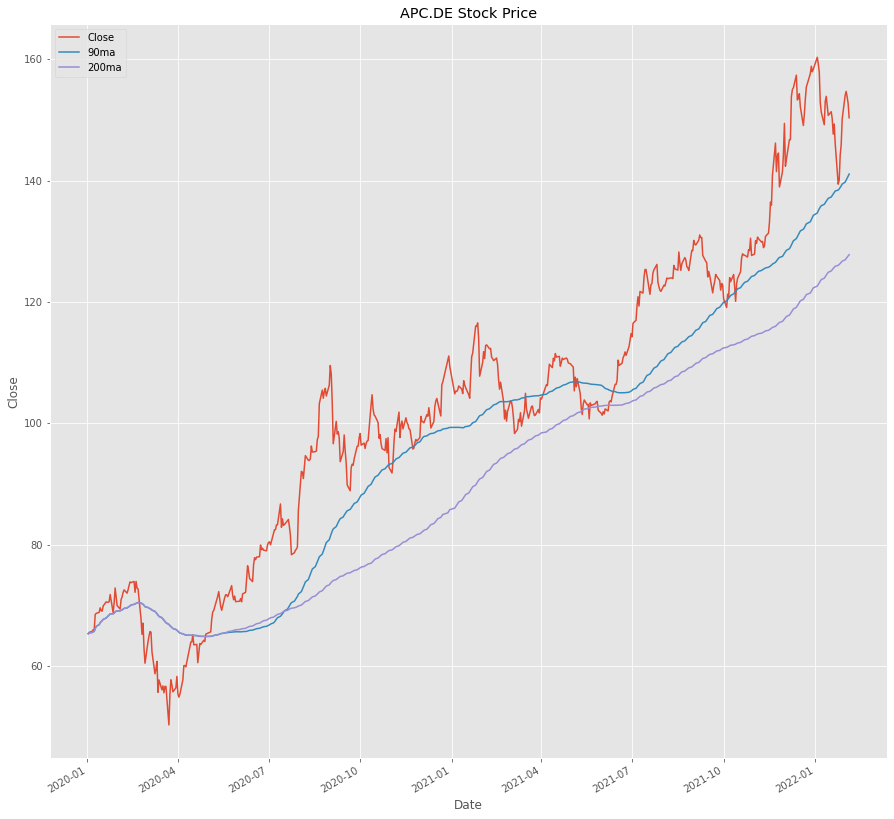


{
    "Symbol": "VOO",
    "Letzter Preis": "412.52",
    "Preis gestern": "410.59",
    "Preis Change": "1.93",
    "52-Wochen-Hoch": 441.26,
    "52-Wochen-Tief": 341.92,
    "Unternehmenswert/EBITDA": null,
    "Durchschnittliche Dividendenrendite 5y": null,
    "Eigenkapitalrendite": null,
    "Schulden/Equity (gesamt) (mrq)": null
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


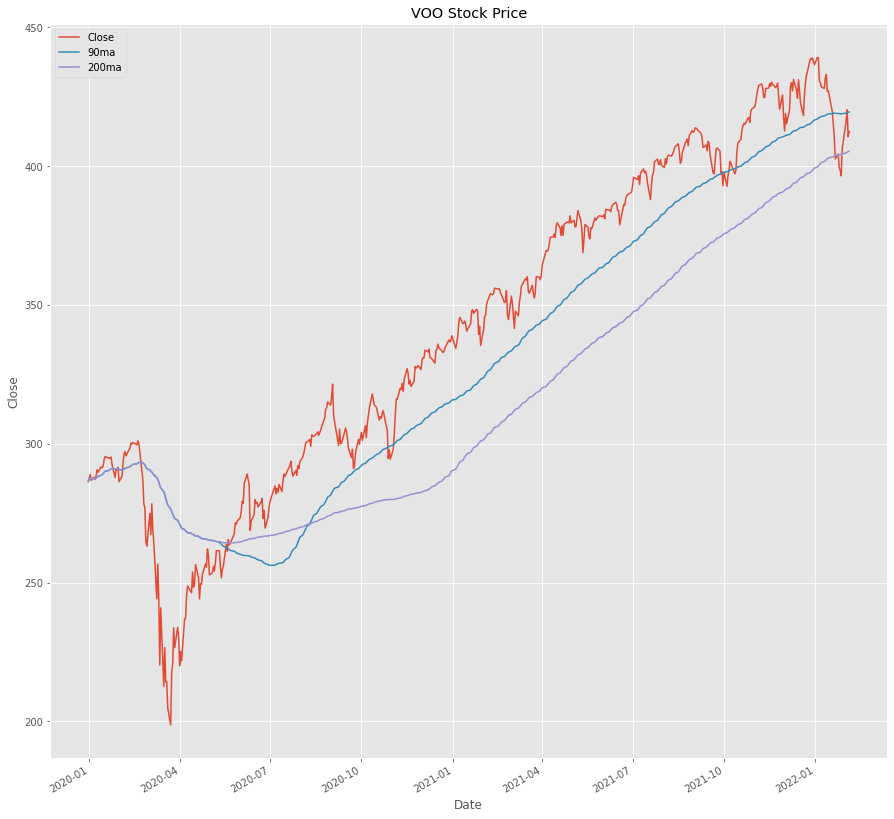


{
    "Symbol": "^GSPC",
    "Letzter Preis": "4500.53",
    "Preis gestern": "4477.44",
    "Preis Change": "23.09",
    "52-Wochen-Hoch": 4818.62,
    "52-Wochen-Tief": 3723.34,
    "Unternehmenswert/EBITDA": null,
    "Durchschnittliche Dividendenrendite 5y": null,
    "Eigenkapitalrendite": null,
    "Schulden/Equity (gesamt) (mrq)": null
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


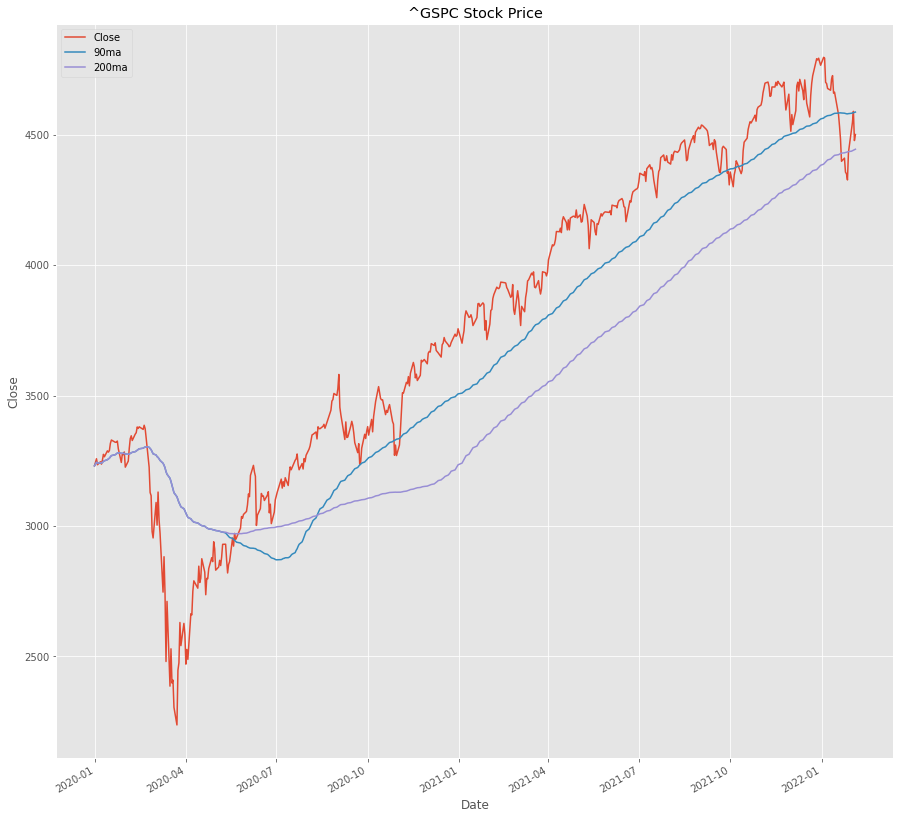


[*********************100%***********************]  1 of 1 completed


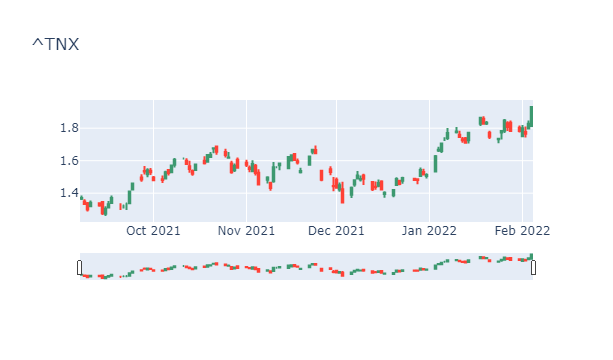

[*********************100%***********************]  1 of 1 completed


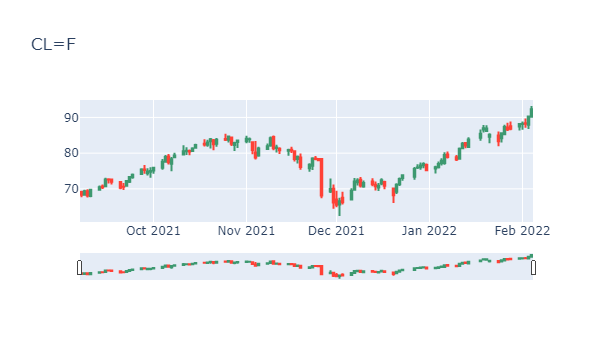

[*********************100%***********************]  1 of 1 completed


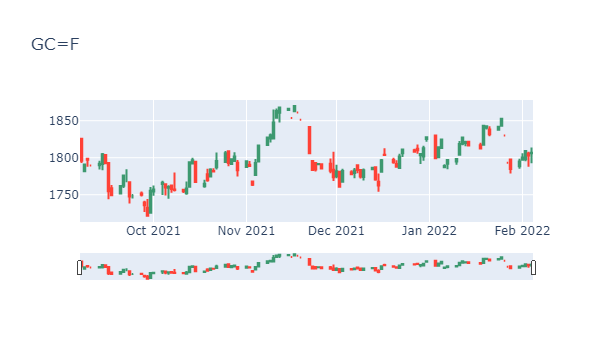

[*********************100%***********************]  1 of 1 completed


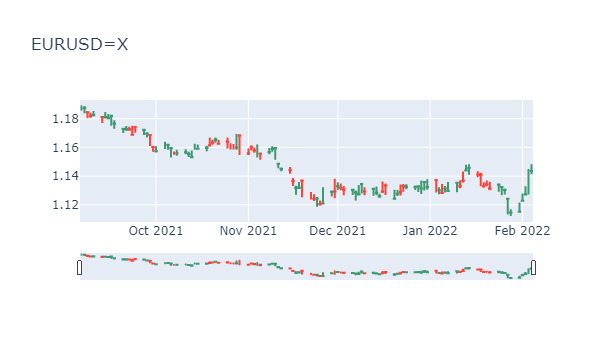

[*********************100%***********************]  1 of 1 completed


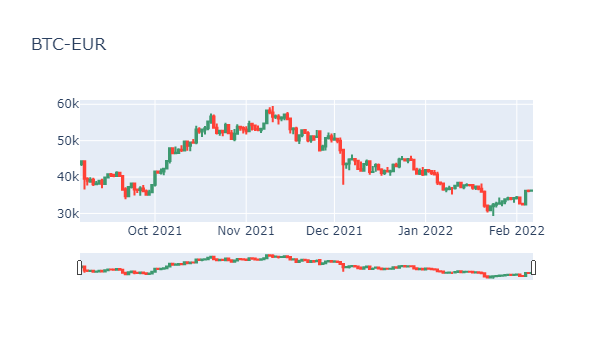

[*********************100%***********************]  1 of 1 completed


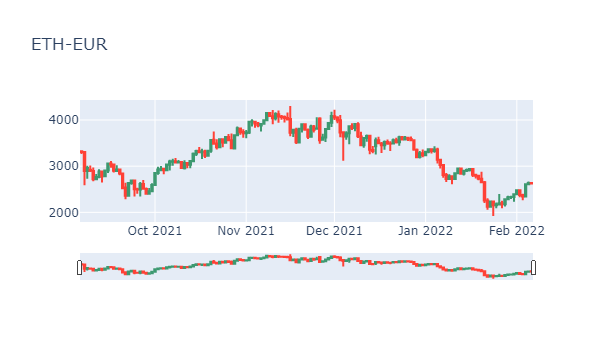

[*********************100%***********************]  1 of 1 completed


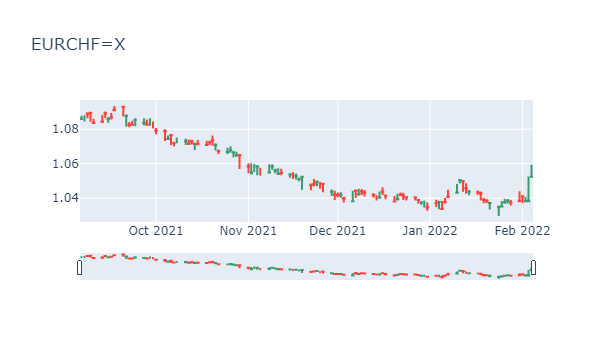

[*********************100%***********************]  1 of 1 completed


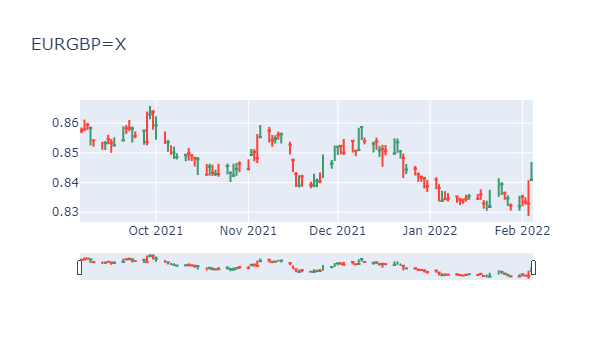

In [8]:
import pandas as pd
import numpy as np
import platform
print('Python version = ' + platform.python_version())
import yfinance as yf
print('yfinance version = ' + yf.__version__)
import json
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import sys
import plotly.graph_objs as go

%matplotlib inline

#Stockdata
tickersymbol = ['TSLA', 'APC.DE', 'VOO', '^GSPC']
fxtickersymbol = ['^TNX','CL=F','GC=F', 'EURUSD=X', 'BTC-EUR', 'ETH-EUR', 'EURCHF=X', 'EURGBP=X']
stock_data = {}

today = datetime.datetime.today().replace(microsecond=0).isoformat()
print('Today = ' + today)
print()

def fetch_data(tickersymbol):
    for symbol in tickersymbol:
        
        #Create Dict from tickerdata
        tickerdata = yf.Ticker(symbol) #Ticker-Object
        daten = tickerdata.info #Dictionary
        #print(json.dumps(daten, indent=4))
        
        #Create DF for time certain period 
        tickerDF = tickerdata.history(period='1d',start='2020-1-1', end=today[:10]) #w isoformat, first 10 chars are the date
        priceLast = tickerDF['Close'].iloc[-1] #last row
        priceYest = tickerDF['Close'].iloc[-2] #row before last
        priceChange = priceLast - priceYest
        
        #Eigene Statistiken
        tickerDF['90ma']=tickerDF['Close'].rolling(window=90, min_periods=0).mean()
        tickerDF['200ma']=tickerDF['Close'].rolling(window=200, min_periods=0).mean()
            
        try:
            data = {
                'Symbol': symbol,
                'Letzter Preis': str("%.2f" % priceLast),
                'Preis gestern': str("%.2f" % priceYest),
                'Preis Change': str("%.2f" % priceChange),
                '52-Wochen-Hoch': daten.get('fiftyTwoWeekHigh'),
                '52-Wochen-Tief': daten.get('fiftyTwoWeekLow'),
                'Unternehmenswert/EBITDA': daten.get('enterpriseToEbitda'),
                'Durchschnittliche Dividendenrendite 5y': daten.get('fiveYearAvgDividendYield'),
                'Eigenkapitalrendite': daten.get('returnOnEquity'),
                'Schulden/Equity (gesamt) (mrq)': daten.get('debtToEquity')
            }
            stock_data[symbol] = data
        except:
            print(sys.exc_info())
            continue
        
        print(json.dumps(stock_data[symbol], indent=4, ensure_ascii=False))
        
        #plots 
        plt.rcParams['figure.figsize']=[15,15]
        print(tickerDF['Close'].plot())
        print(tickerDF['90ma'].plot())
        print(tickerDF['200ma'].plot())
        plt.grid(True)    
        plt.xlabel('Date')
        plt.ylabel('Close')
        plt.legend()
        plt.title(symbol + ' Stock Price')
        plt.show() #mpld3.show() - falls im Browser
        style.use('ggplot')
        
        print()
        
def fx_rates(fxtickersymbol):
    for symbol in fxtickersymbol:
        data = yf.download(tickers=symbol, period='5mo', interval='1d')

        fig = go.Figure()
        
        #candlestick
        fig.add_trace(go.Candlestick(x=data.index,
                                    open=data['Open'],
                                    high=data['High'],
                                    low=data['Low'],
                                    close=data['Close'], name='market data'))
        #add titles
        fig.update_layout(
            title=symbol)
        fig.show()
    
fetch_data(tickersymbol)
fx_rates(fxtickersymbol)
